# Import and preprocessing

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [9]:
path_file = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(path_file)
churn_df.head(3)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0


In [10]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [11]:
# choose: 'tenure' (thâm niên), 'age', 'address', 'income', 'ed'(học vấn), 'employ', 'equip' 'churn'
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df.head(3)

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0


In [12]:
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head(3)

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0


In [18]:
# Choose variable x, y & DataFrame -> Array
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].to_numpy()
y = churn_df['churn'].to_numpy()
X[0:5]
y[0:5]

array([1, 1, 0, 0, 0])

In [21]:
# Normalize the dataset
scaler = StandardScaler()
scaler.fit(X) # tính mean và std
X_norm = scaler.transform(X) # Áp dụng Z-score từ mean và std
X_norm[0:3]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695]])

In [26]:
# Split (The trained model has to be tested and evaluated on data which has not been used during training)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

# Logistic Regression Classifier modeling

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_hat_test = log_reg.predict(X_test)
y_hat_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [30]:
# the prediction probability of data point of the test data set
y_hat_test_prob = log_reg.predict_proba(X_test)
y_hat_test_prob[:10]
# [0.74643946, 0.25356054] -> 0
# [0.26152115, 0.73847885] -> 1

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

In [32]:
log_reg.coef_

array([[-0.84569763, -0.17566042, -0.12422107, -0.01015039,  0.06012391,
        -0.23290551,  0.75198953]])

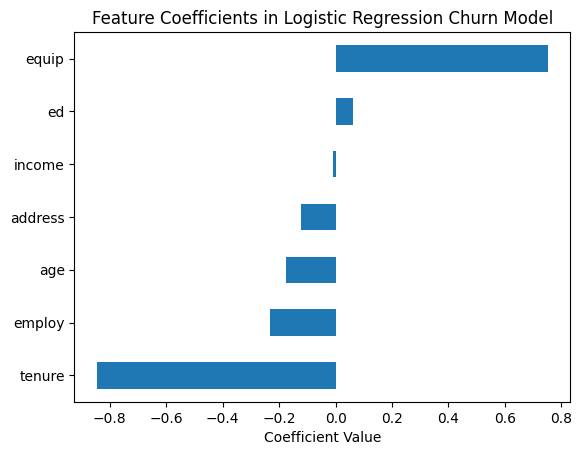

In [31]:
# what role each input feature
coefficients = pd.Series(log_reg.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

In [33]:
# log loss
log_loss(y_test, y_hat_test_prob)

0.6257718410257235